In [1]:
# reveal.js presentation configuration
from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'league',
              'transition': 'fade',
              'center': 'false',
              'overview' : 'true',
              'start_slideshow_at': 'selected'
})

# import utility libraries
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 12.0)
#pd.core.format.set_option('notebook_repr_html',True)
pd.set_option('display.max_rows', 10)

# pretty print function
def pp(obj):
    print pd.DataFrame(obj)
    
%matplotlib inline


/Users/fgonza/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Playing with word2vec

[Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia

## Google News dataset

* Internal Google data set with one billion words
* 692k vocabulary. Words with frequency below 5 were discarded.
* 300-dimensions representation was obtained by training a skip-gram model.
* Model available at https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

## Loading the model with `gensim`

In [2]:
# import wrod2vec model from gensim
from gensim.models.word2vec import Word2Vec

# load Google News pre-trained network
model = Word2Vec.load_word2vec_format('GNvectors.bin', binary=True)

## Continuous representation of words

In [3]:
pp(model['table'])

            0
0   -0.144531
1   -0.026489
2    0.117676
3    0.213867
4   -0.042236
..        ...
295 -0.076660
296  0.069824
297 -0.095215
298 -0.098145
299 -0.012268

[300 rows x 1 columns]


## Semantically related words have similar representations

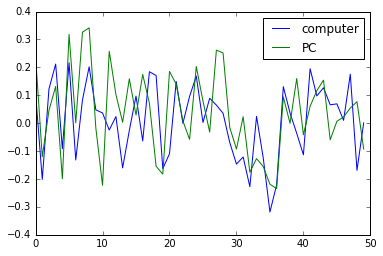

In [4]:
plt.plot(model['computer'][:50], label = 'computer')
plt.plot(model['PC'][:50], label = 'PC')
plt.legend()

# Vector representation similarity = semantic similarity

In [21]:
pp(model.most_similar(positive=[u'Mexico']))

                      0         1
0                Mexcio  0.705328
1                México  0.696470
2               Mexican  0.676909
3      PORTALES_Eastern  0.661456
4              Mexicans  0.652560
5             Guatemala  0.642283
6  Monterrey_Nuevo_León  0.624553
7               Mexicos  0.616529
8             Jaime_Zea  0.616252
9             Monterrey  0.614505


## Word vector space encodes linguistic regularities

<img width= 600 src="linguistic regularities.jpg">

## Solving analogies

* **man** is to **woman** as **king** is to **??**
* Relationships are encoded by word vector differences: 
$$ f(\textrm{"woman"}) - f(\textrm{"man"}) = f(\textrm{"??"}) - f(\textrm{"king"})$$
* We can add the relationship encoding vector to a the vector of **king**: $$ f(\textrm{"king"}) + (f(\textrm{"woman"}) - f(\textrm{"man"})) = f(\textrm{"??"}) $$

$$ f(\textrm{"king"}) + (f(\textrm{"woman"}) - f(\textrm{"man"})) = f(\textrm{"??"}) $$

In [20]:
result = model.most_similar(negative=['man'], 
                            positive=['woman', 'king'])
pp(result)

               0         1
0          queen  0.711819
1        monarch  0.618967
2       princess  0.590243
3   crown_prince  0.549946
4         prince  0.537732
5          kings  0.523684
6  Queen_Consort  0.523595
7         queens  0.518113
8         sultan  0.509859
9       monarchy  0.508741


## Finding country presidents

In [28]:
def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)/2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)/2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
                )

In [26]:
def analogy(worda, wordb, wordc):
    result = model.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]
countries = ['Mexico', 'Colombia', 'Brazil', 'Venezuela', 'France', 'Spain', 'Egypt', 'China']
presidents = [analogy('USA', 'President_Barack_Obama', country) for country in countries]
pp(zip(countries,presidents))

           0                          1
0     Mexico  President_Felipe_Calderon
1   Colombia     President_Alvaro_Uribe
2     Brazil      President_Luiz_Inacio
3  Venezuela      President_Hugo_Chavez
4     France  President_Nicolas_Sarkozy
5      Spain                   Zapatero
6      Egypt    President_Hosni_Mubarak
7      China         Premier_Wen_Jiabao


## President_of vector

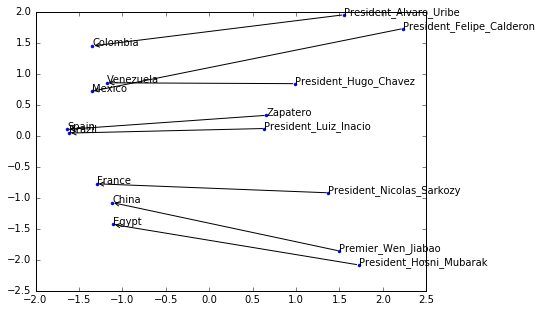

In [29]:
labels = countries + presidents
data = [model[w] for w in labels]
plot_data(data, labels)

## Compositionality

In [30]:
 pp(model.most_similar(positive=['Mexican', 'river']))

                          0         1
0                Rio_Grande  0.680104
1                     creek  0.599652
2               Rio_Conchos  0.582544
3                      lake  0.577315
4                 Río_Bravo  0.577050
5            Nogales_Sonora  0.572667
6                Los_Ebanos  0.571761
7         Mississippi_River  0.571416
8                Río_Grande  0.569076
9  Elephant_Butte_Reservoir  0.568977


## Visualizing embeddings with t-sne

* We will visualize the 2000 most frequent words in English (http://www.rupert.id.au/resources/4000-most-common-english-words-csv.csv).

In [12]:
target_words = [line.strip().lower() for line in open("4000-most-common-english-words-csv.csv")][:2000]
words = [word for word in target_words if word in model] 
target_matrix = np.array([model[word] for word in words])

(1993, 300)


* t-Distributed Stochastic Neighbor Embedding (t-SNE) dimensionality reduction tecnique Well suited for the visualization of high-dimensional datasets (http://lvdmaaten.github.io/tsne/code/tsne_python.zip)

In [14]:
from tsne import tsne
reduced_matrix = tsne(target_matrix, 2);

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  1993 ...
Computing P-values for point  500  of  1993 ...
Computing P-values for point  1000  of  1993 ...
Computing P-values for point  1500  of  1993 ...
Mean value of sigma:  0.570938183607
Iteration  10 : error is  20.8876487795
Iteration  20 : error is  20.1391138395
Iteration  30 : error is  19.4412413975
Iteration  40 : error is  19.5714942431
Iteration  50 : error is  19.5431724837
Iteration  60 : error is  19.5270005853
Iteration  70 : error is  19.5360339413
Iteration  80 : error is  19.5365027115
Iteration  90 : error is  19.5348523669
Iteration  100 : error is  19.5351393368
Iteration  110 : error is  2.90496177125
Iteration  120 : error is  2.42259317428
Iteration  130 : error is  2.194011999
Iteration  140 : error is  2.05385177368
Iteration  150 : error is  1.95734451365
Iteration  160 : error is  1.8847212918
Iteration  170 : error is  1.82844210237
Iteration  180 : e

In [35]:
max_x = np.amax(reduced_matrix, axis=0)[0]
max_y = np.amax(reduced_matrix, axis=0)[1]

## Visualization

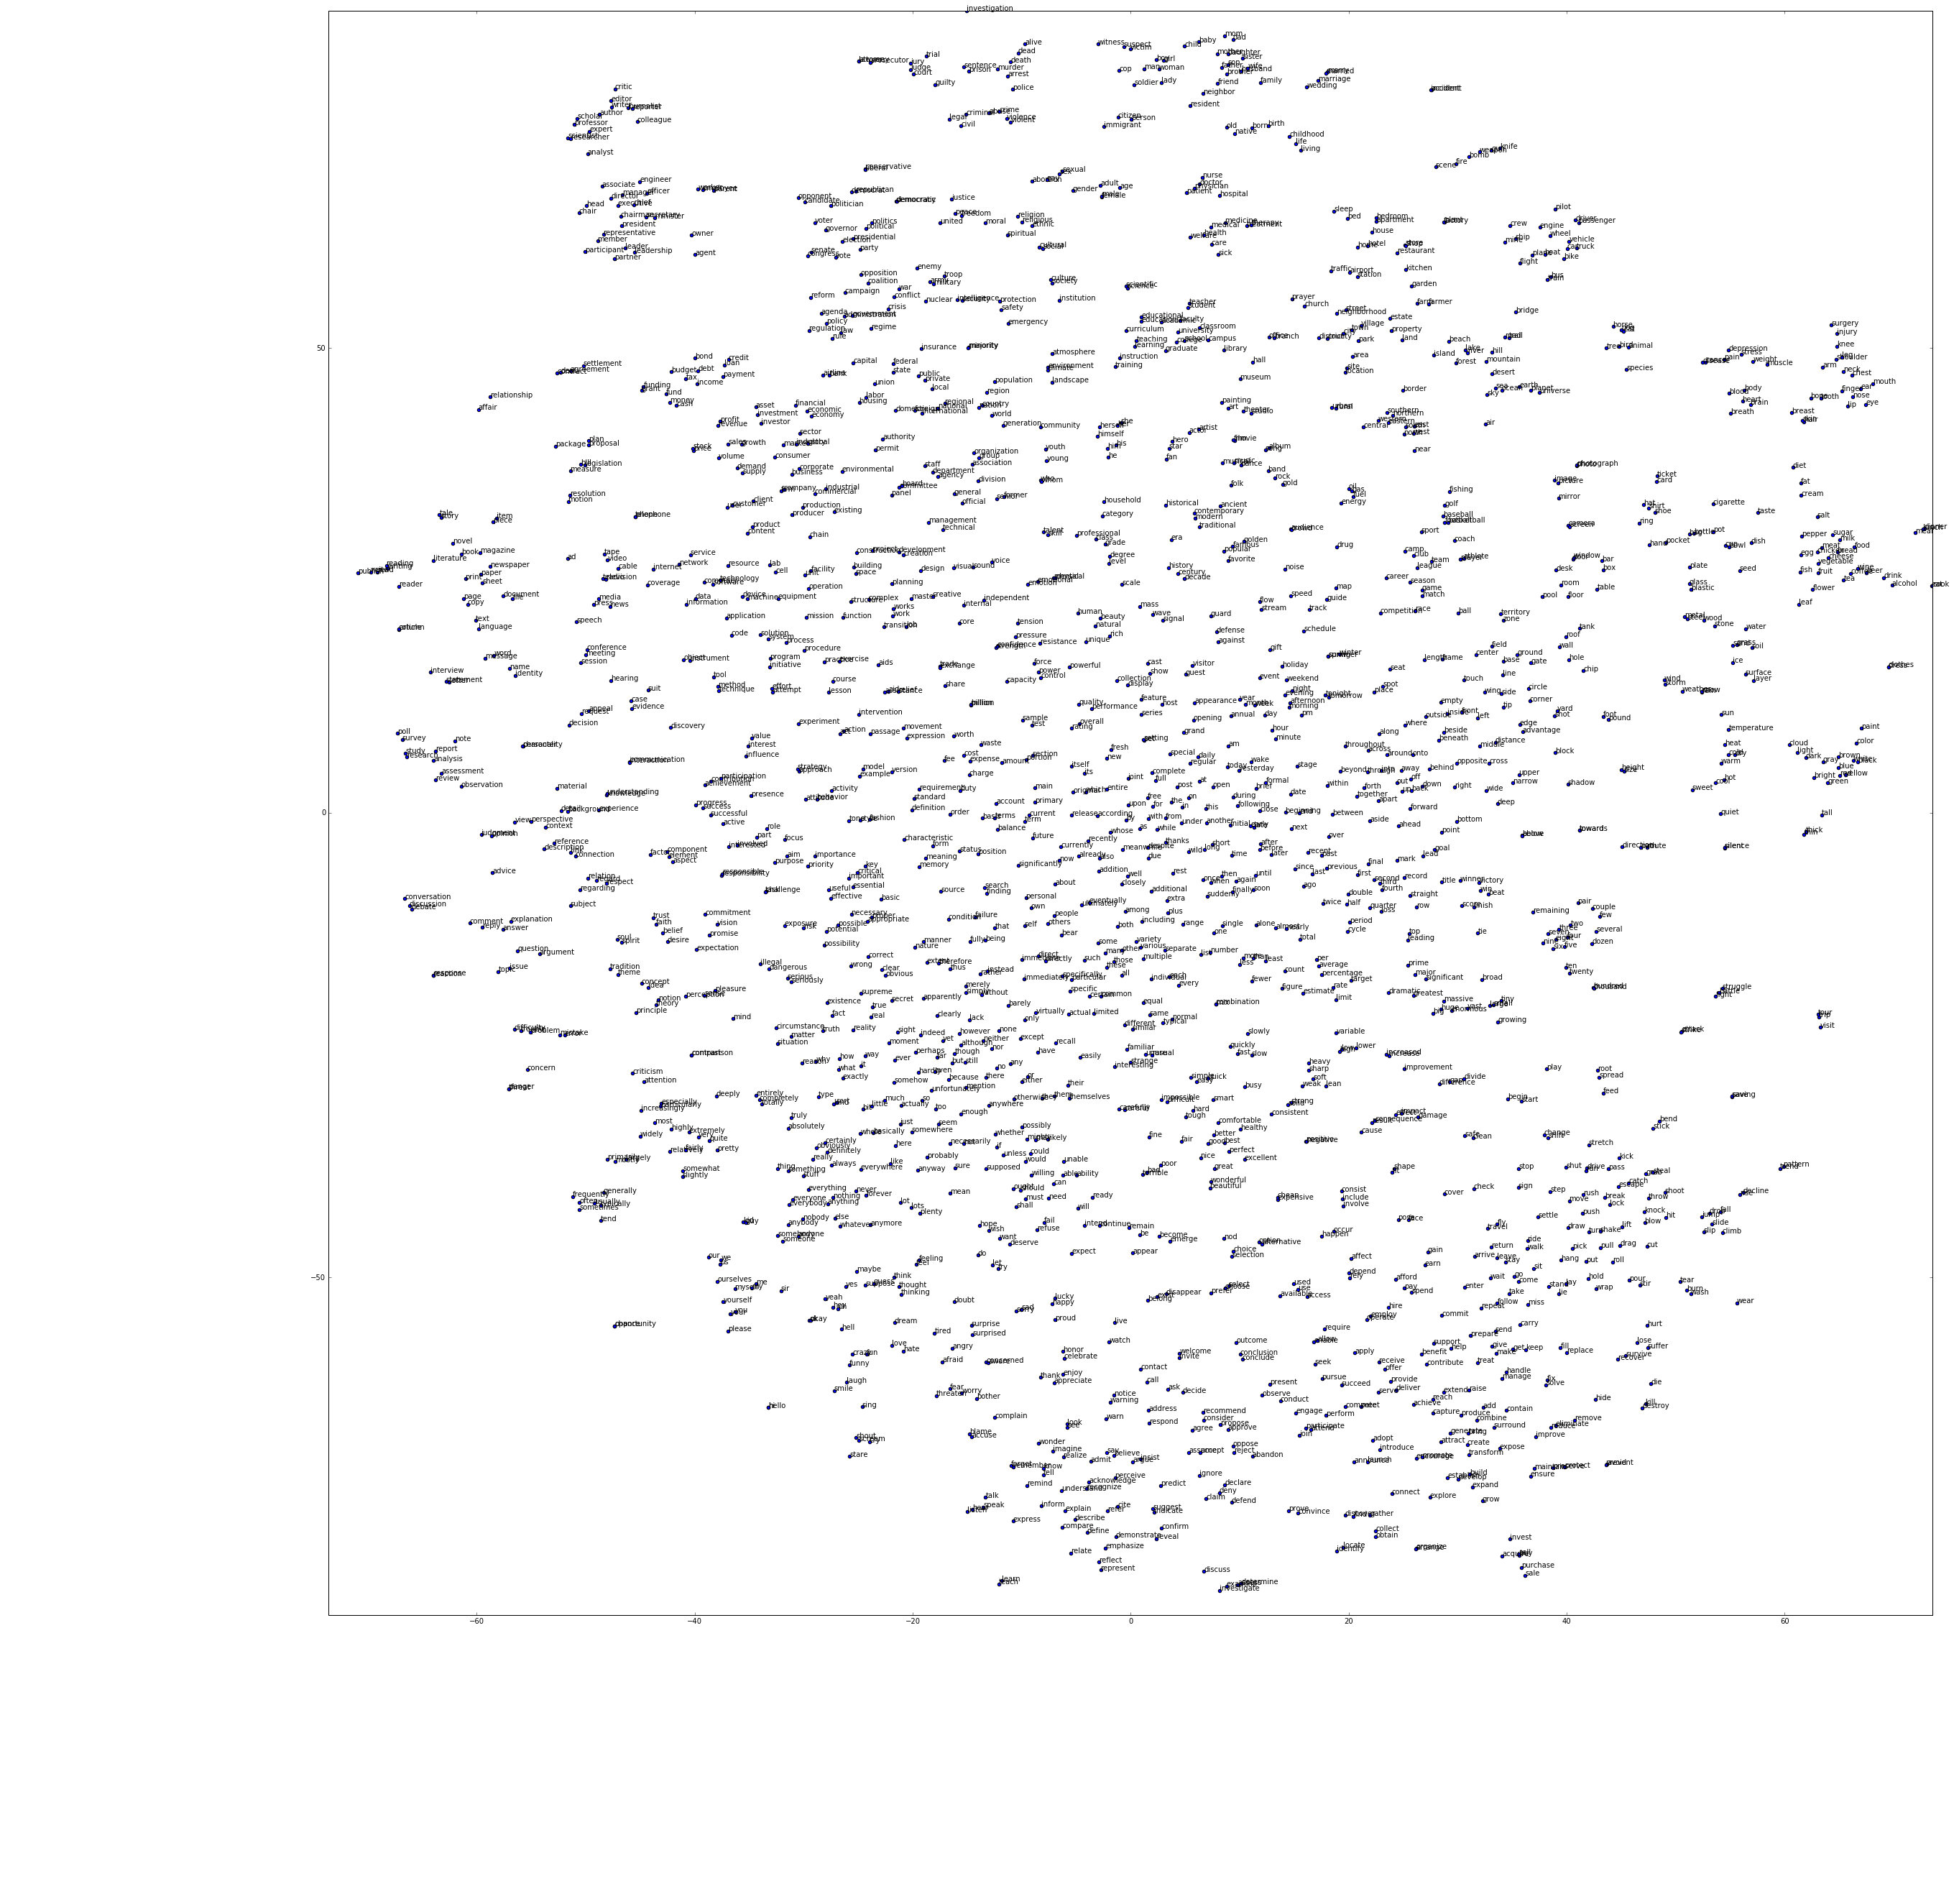

In [37]:
plt.figure(figsize=(40, 40), dpi=100); plt.xlim((-max_x,max_x)); plt.ylim((-max_y,max_y))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20);
for idx, word in enumerate(words[:]):
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]
    plt.annotate(word, (x,y))